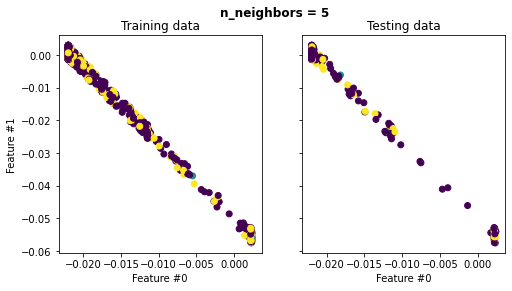

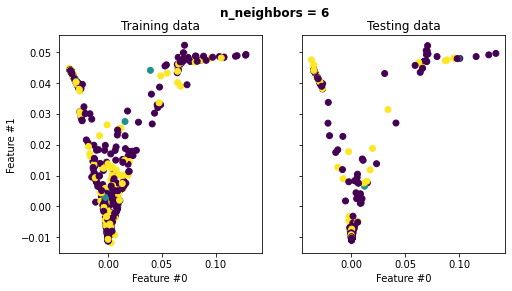

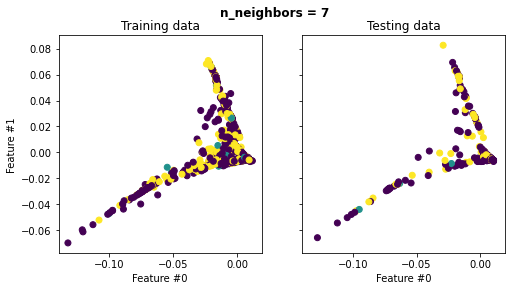

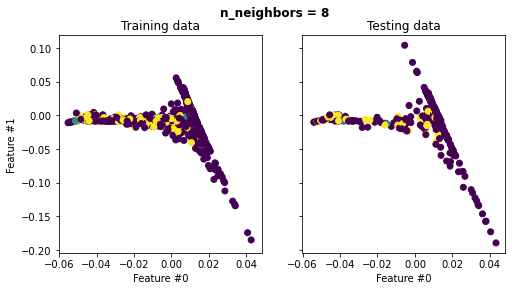

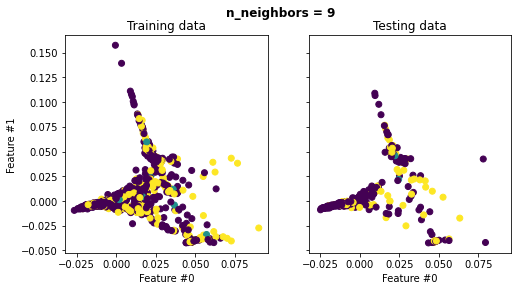

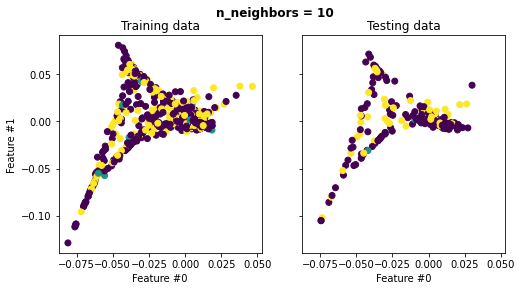

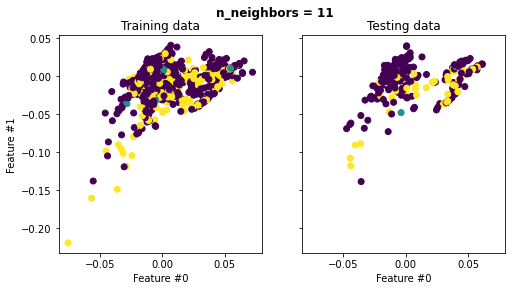

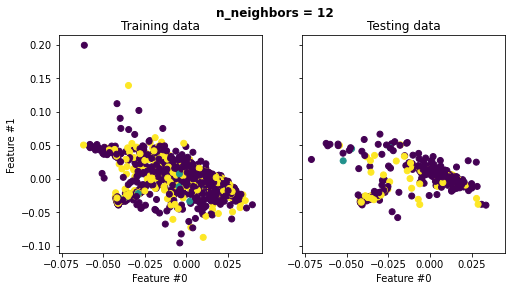

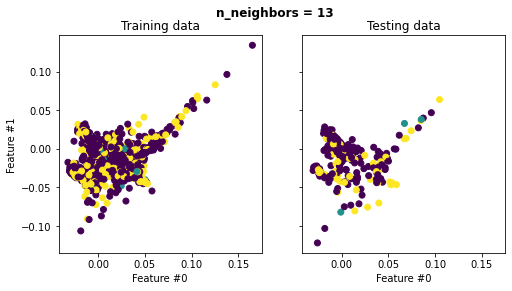

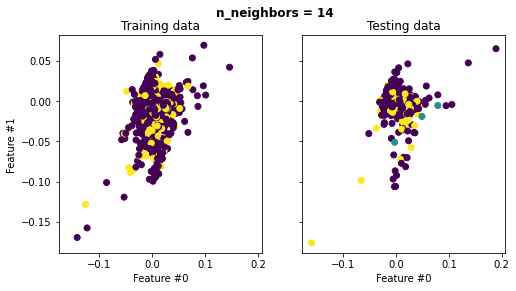

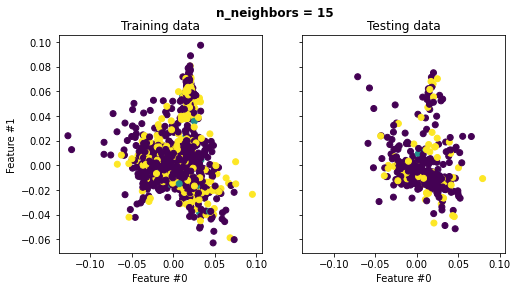

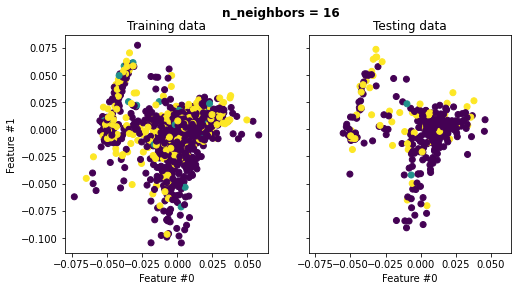

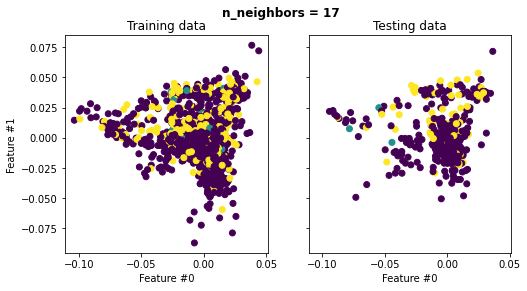

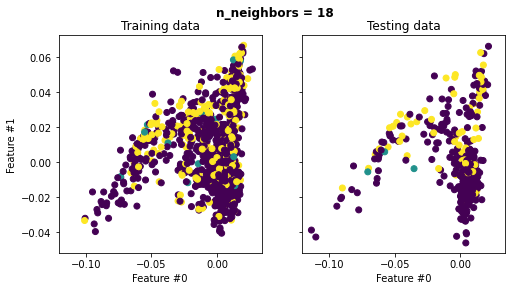

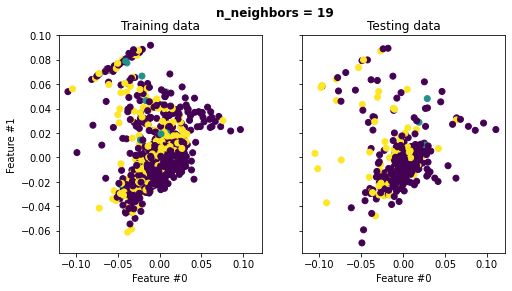

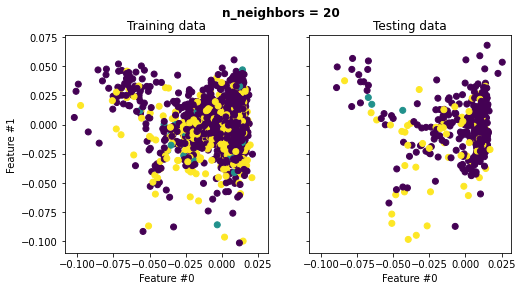

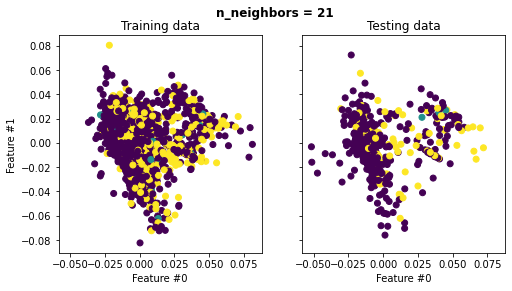

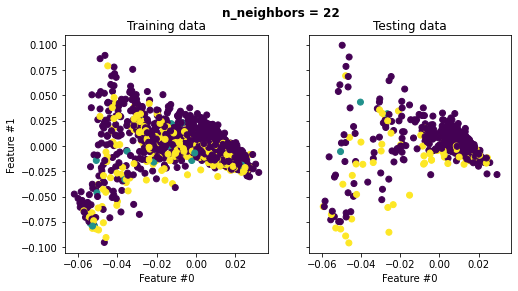

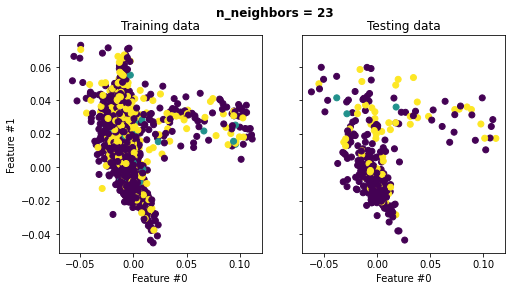

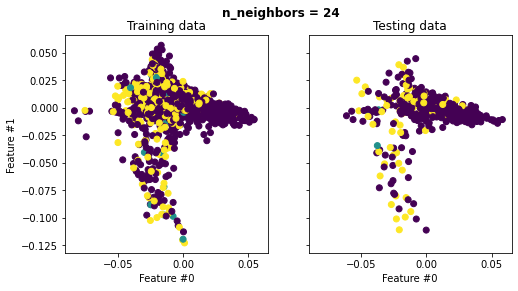

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


multi_data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
binary_data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

test_propotion = 0.99
test_threshold = int((1-test_propotion)*multi_data.shape[0])

validate_propotion = 0.2
validate_threshold = int((1-validate_propotion)*test_threshold)

X = multi_data.to_numpy()[:test_threshold,1:]
y = multi_data.to_numpy()[:test_threshold,0]

X_train = X[:validate_threshold,:]#90% trainging
y_train = y[:validate_threshold]#10% testing

X_test = X[validate_threshold:,:]#90% trainging
y_test = y[validate_threshold:]#10% testing

from sklearn.manifold import Isomap, LocallyLinearEmbedding

def plot_embedding(X_train_transformed,X_test_transformed):
	
	fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
	
	train_ax.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train)
	train_ax.set_ylabel("Feature #1")
	train_ax.set_xlabel("Feature #0")
	train_ax.set_title("Training data")
	
	test_ax.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=y_test)
	test_ax.set_xlabel("Feature #0")
	_ = test_ax.set_title("Testing data")
	
	fig.suptitle("n_neighbors = %d"% n_neighbors,fontweight ="bold")
	

for n_neighbors in range(5,25):
	embedding = LocallyLinearEmbedding(n_components=2,n_neighbors = n_neighbors)
	#embedding = Isomap(n_components=2,n_neighbors = n_neighbors)
	X_train = embedding.fit_transform(X)
	X_train_transformed = X_train[:validate_threshold]
	X_test_transformed = X_train[validate_threshold:]
	plot_embedding(X_train_transformed,X_test_transformed)